<a href="https://colab.research.google.com/github/mrizazul/PCVK_GENAP_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


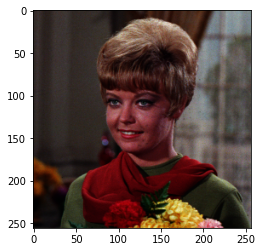

In [9]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


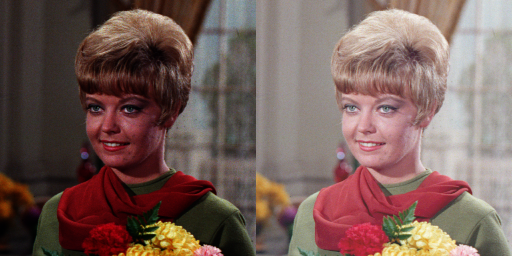

In [5]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number') 

original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)
     

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

20.236375718737925


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


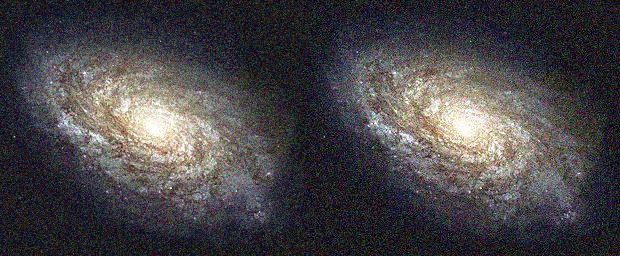

20.18408377176558


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.


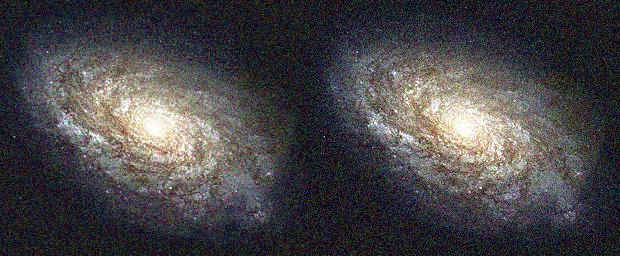

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.


20.22672144511099


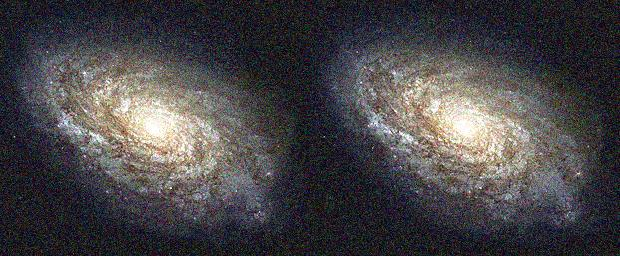

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.


20.195524725919235


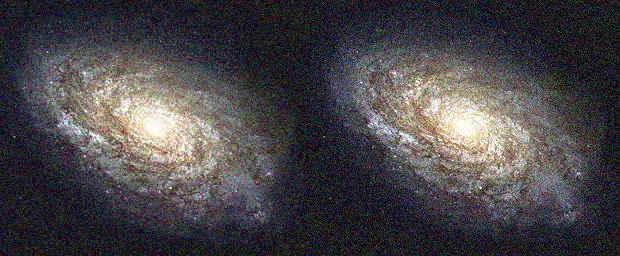

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.


20.203062647574313


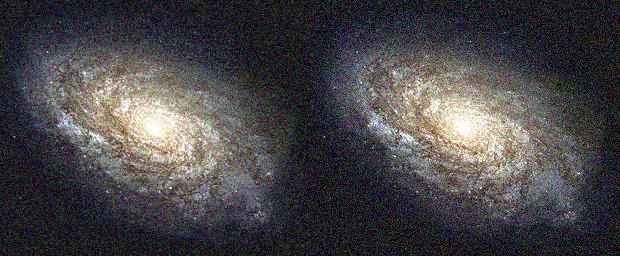

In [12]:
import glob
from skimage.measure import compare_psnr

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/Assets/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n) 

# Citra di Average 5
start_img = cv_img[0]
noisy_img = cv_img[5]
PSNR = compare_psnr(start_img, noisy_img)
print(PSNR)

final_frame = cv.hconcat((start_img, noisy_img))
cv2_imshow(final_frame)

# Citra di Average 30
start_img = cv_img[0]
noisy_img = cv_img[30]
PSNR = compare_psnr(start_img, noisy_img)
print(PSNR)

final_frame = cv.hconcat((start_img, noisy_img))
cv2_imshow(final_frame)

# Citra di Average 60
start_img = cv_img[0]
noisy_img = cv_img[60]
PSNR = compare_psnr(start_img, noisy_img)
print(PSNR)

final_frame = cv.hconcat((start_img, noisy_img))
cv2_imshow(final_frame)

# Citra di Average 80
start_img = cv_img[0]
noisy_img = cv_img[80]
PSNR = compare_psnr(start_img, noisy_img)
print(PSNR)

final_frame = cv.hconcat((start_img, noisy_img))
cv2_imshow(final_frame)

# Citra di Average 100
start_img = cv_img[0]
noisy_img = cv_img[99]
PSNR = compare_psnr(start_img, noisy_img)
print(PSNR)

final_frame = cv.hconcat((start_img, noisy_img))
cv2_imshow(final_frame)

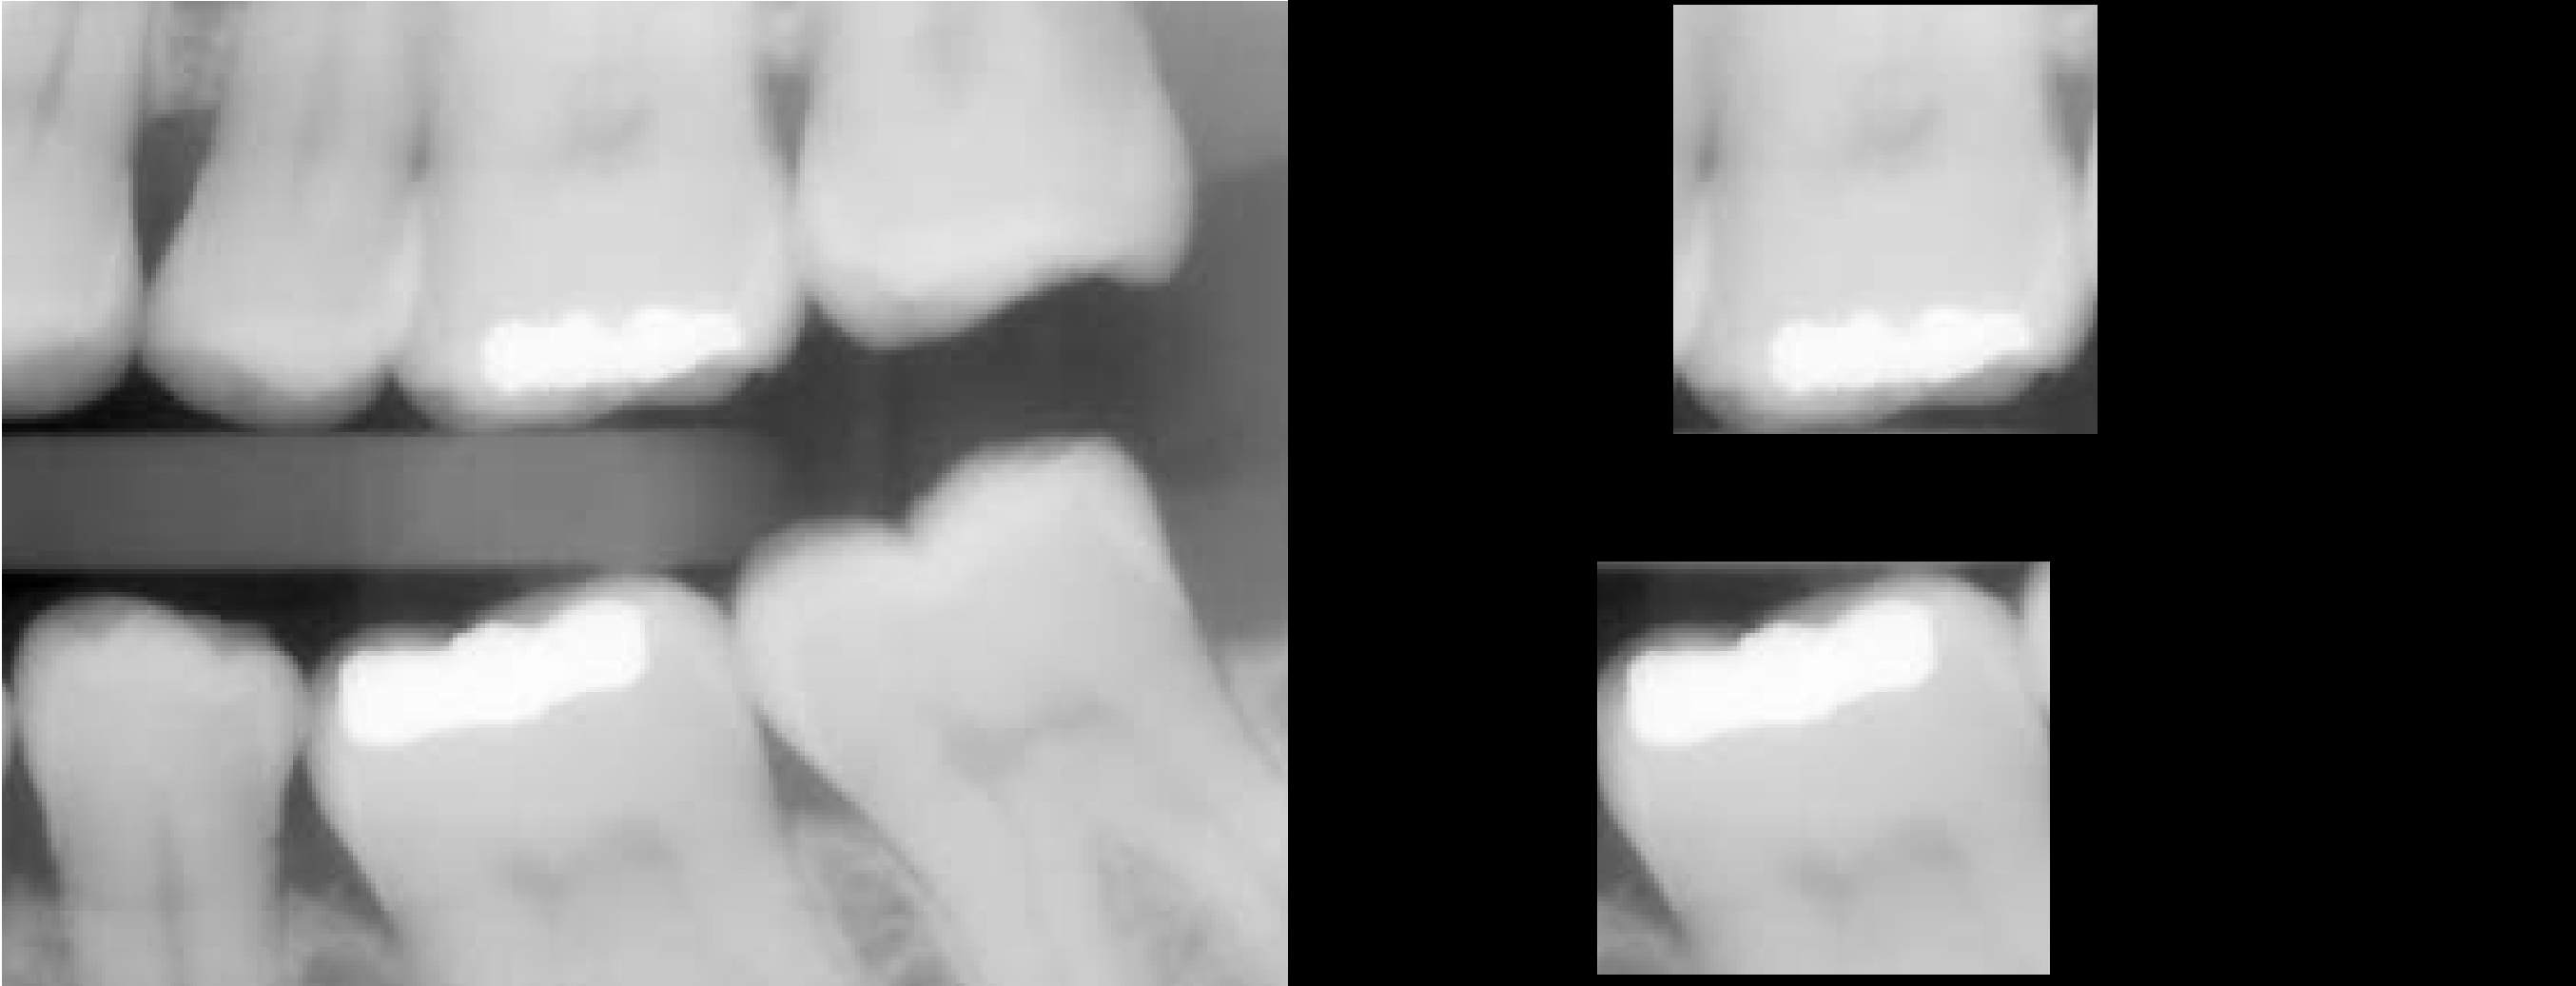

In [13]:
img = cv.imread('/content/drive/MyDrive/Assets/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(325, 590), pt2=(800,1023), color=(255,255,255), thickness=-1)
result = img & mask
mask1 = cv.rectangle(mask, pt1=(405,5), pt2=(850,455), color=(255,255,255), thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

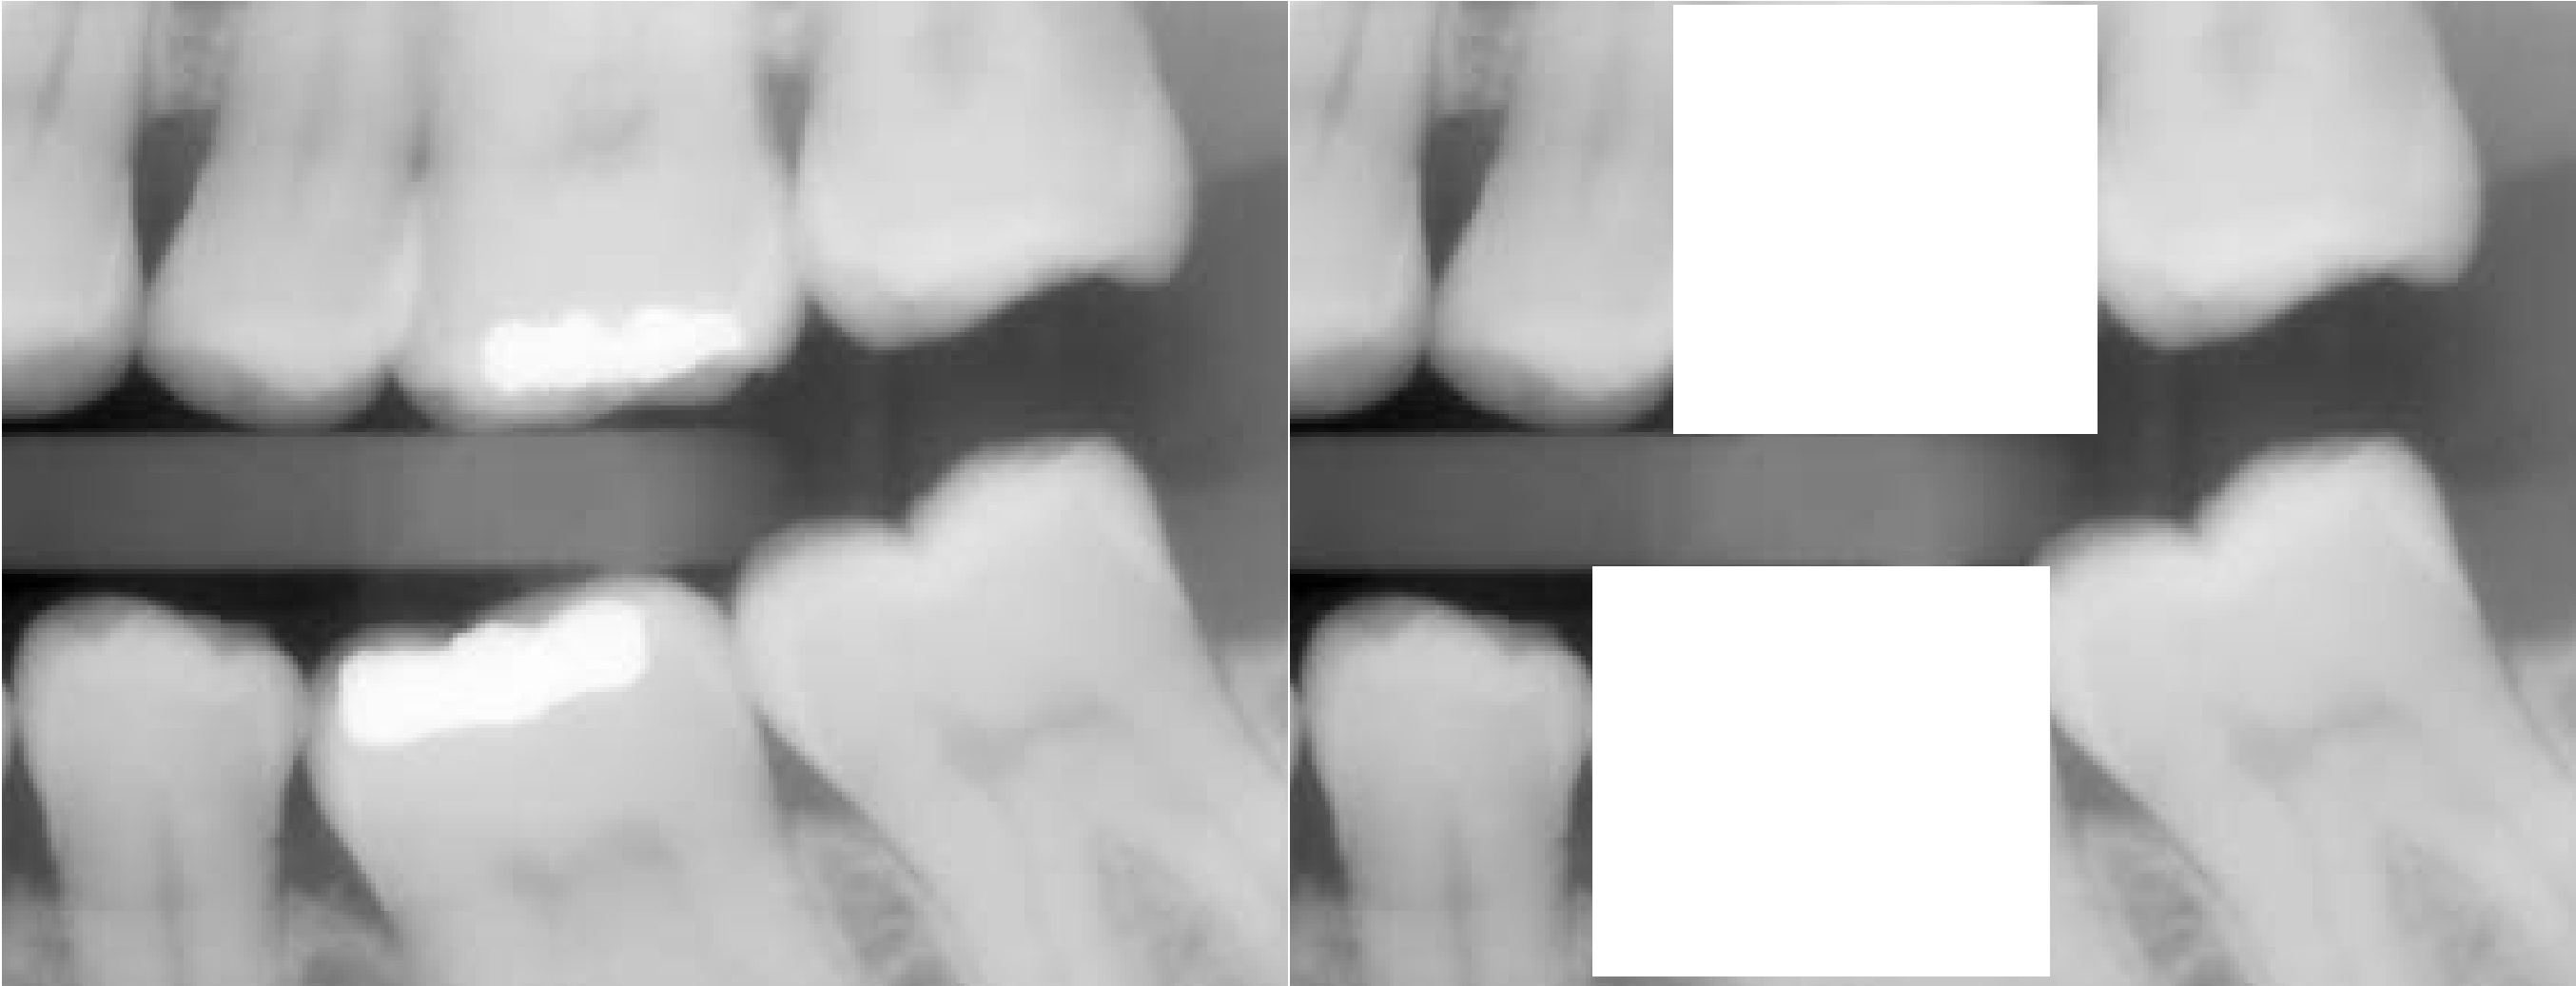

In [14]:
#OR
img = cv.imread('/content/drive/MyDrive/Assets/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

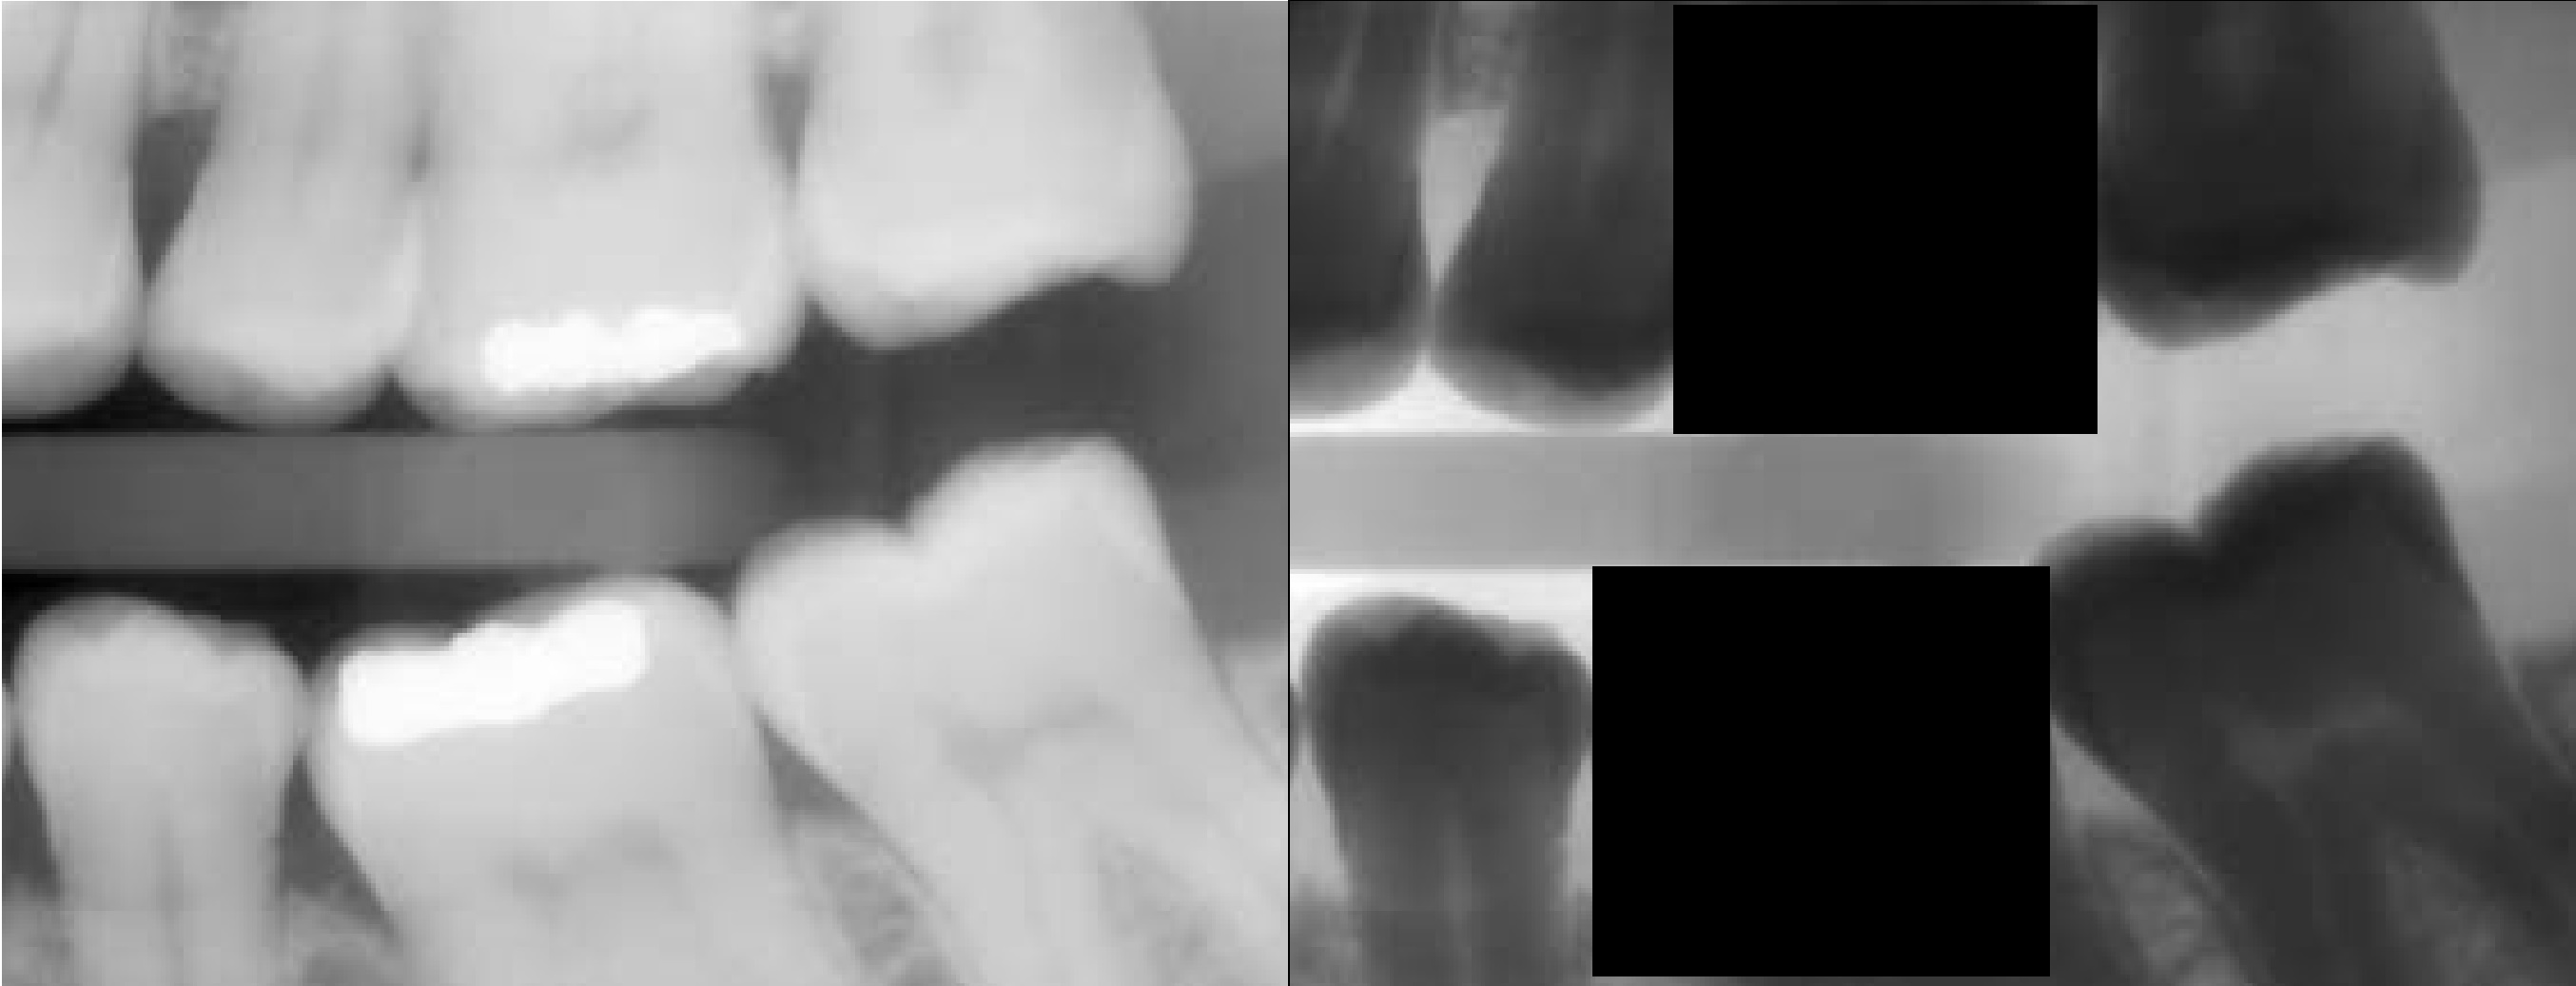

In [15]:
#NOT
img = cv.imread('/content/drive/MyDrive/Assets/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

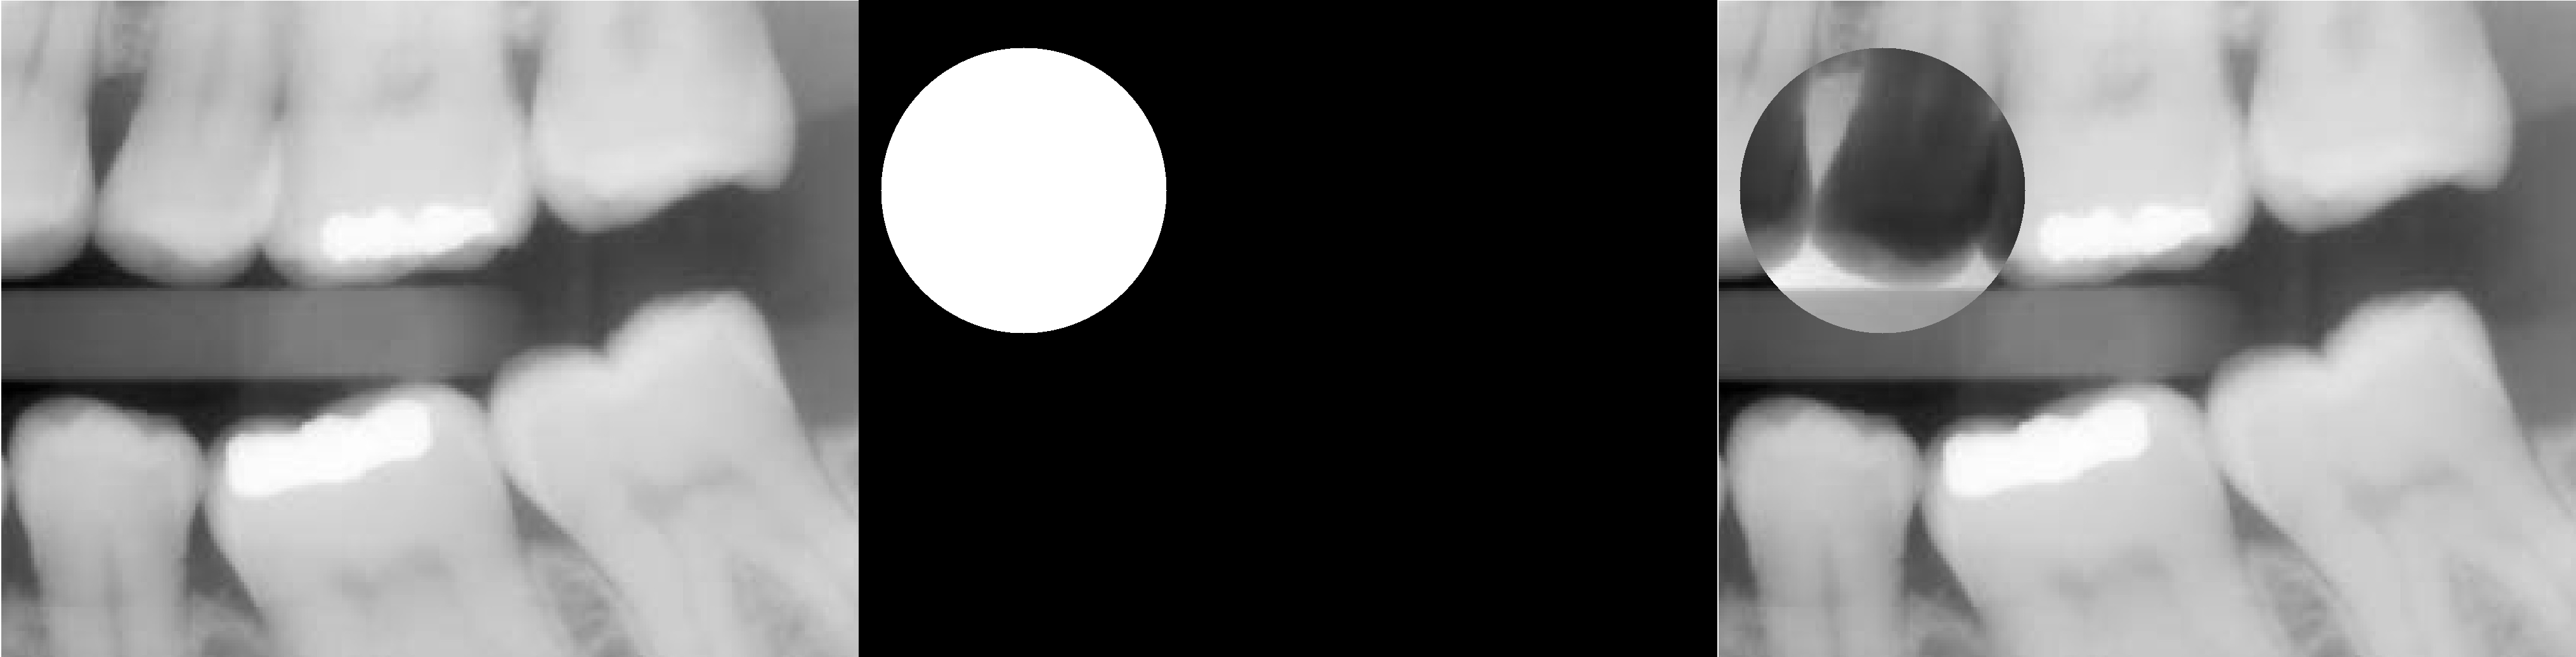

In [17]:
#XOR
img = cv.imread('/content/drive/MyDrive/Assets/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)